In [2]:
from numpy.random import rand, randint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [3]:
cl = pd.read_excel(open('Renovation.xlsx', 'rb'),sheet_name='CodeList')
ot = pd.read_excel(open('Renovation.xlsx', 'rb'),sheet_name='Others')
wd =pd.read_excel(open('Renovation.xlsx', 'rb'),sheet_name='Windows')
dataSet = []
ch = ''
for cl_index, cl_row in cl.iterrows():
    ch = ''
    
    # For Wall

    for ot_index, ot_row in ot.iterrows():    
        if cl.iloc[cl_index, 1] == ot.iloc[ot_index,0]:
            if len(str(ot.iloc[ot_index,3])) == 3:
                ch= '0'+str(ot.iloc[ot_index,3])
            else:
                ch = str(ot.iloc[ot_index,3])
                
    # For Roof         
    for ot_index, ot_row in ot.iterrows():        
        if cl.iloc[cl_index, 2] == ot.iloc[ot_index,0]:
            if len(str(ot.iloc[ot_index,3])) == 3:
                ch= ch+'0'+str(ot.iloc[ot_index,3])
                
            elif len(str(ot.iloc[ot_index,3])) == 2:
                ch= ch+'00'+str(ot.iloc[ot_index,3])
            
            elif len(str(ot.iloc[ot_index,3])) == 1:
                ch= ch+'000'+str(ot.iloc[ot_index,3])
                
            else:
                ch = ch+str(ot.iloc[ot_index,3])
    # For Floor            
    for ot_index, ot_row in ot.iterrows():        
        if cl.iloc[cl_index, 3] == ot.iloc[ot_index,0]:
            if len(str(ot.iloc[ot_index,3])) == 3:
                ch= ch+'0'+str(ot.iloc[ot_index,3])
                
            elif len(str(ot.iloc[ot_index,3])) == 2:
                ch= ch+'00'+str(ot.iloc[ot_index,3])
            
            elif len(str(ot.iloc[ot_index,3])) == 1:
                ch= ch+'000'+str(ot.iloc[ot_index,3])
                
            else:
                ch = ch+str(ot.iloc[ot_index,3])
                
    # For Windows
    for wd_index, wd_row in wd.iterrows():    
        if cl.iloc[cl_index, 4] == wd.iloc[wd_index,0]:
            if len(str(wd.iloc[wd_index,3])) == 2:
                ch= ch+'0'+str(wd.iloc[wd_index,3])
            
            elif len(str(wd.iloc[wd_index,3])) == 1:
                ch= ch+'00'+str(wd.iloc[wd_index,3])
                
            else:
                ch = ch+str(wd.iloc[wd_index,3])
                
            dataSet.append(ch)

In [4]:
def itemCost(wall,roof,floor,window):

    total = []
    ch = ''

    # For Wall
    for ot_index, ot_row in ot.iterrows():
        if len(str(ot.iloc[ot_index,3])) == 3:
            ch= '0'+str(ot.iloc[ot_index,3])
        else:
            ch = str(ot.iloc[ot_index,3])

        if wall == ch:
            total.append(ot.iloc[ot_index,0])
            total.append(ot.iloc[ot_index,1])
            break

    # For Roof         
    for ot_index, ot_row in ot.iterrows():
        if len(str(ot.iloc[ot_index,3])) == 3:
            ch= '0'+str(ot.iloc[ot_index,3])

        elif len(str(ot.iloc[ot_index,3])) == 2:
            ch= '00'+str(ot.iloc[ot_index,3])

        elif len(str(ot.iloc[ot_index,3])) == 1:
            ch= '000'+str(ot.iloc[ot_index,3])

        else:
            ch = str(ot.iloc[ot_index,3])

        if roof == ch:
            total.append(ot.iloc[ot_index,0])
            total.append(ot.iloc[ot_index,1])
            break

    # For Floor            
    for ot_index, ot_row in ot.iterrows():        
        if len(str(ot.iloc[ot_index,3])) == 3:
            ch= '0'+str(ot.iloc[ot_index,3])

        elif len(str(ot.iloc[ot_index,3])) == 2:
            ch= '00'+str(ot.iloc[ot_index,3])

        elif len(str(ot.iloc[ot_index,3])) == 1:
            ch= '000'+str(ot.iloc[ot_index,3])

        else:
            ch = str(ot.iloc[ot_index,3])

        if floor == ch:
            total.append(ot.iloc[ot_index,0])
            total.append(ot.iloc[ot_index,1])
            break


    # For Windows
    for wd_index, wd_row in wd.iterrows():    
        if len(str(wd.iloc[wd_index,3])) == 2:
            ch= '0'+str(wd.iloc[wd_index,3])

        elif len(str(wd.iloc[wd_index,3])) == 1:
            ch= '00'+str(wd.iloc[wd_index,3])

        else:
            ch = str(wd.iloc[wd_index,3])

        if window == ch:
            total.append(wd.iloc[wd_index,0])
            total.append(wd.iloc[wd_index,1])
            break

    return total

In [5]:
def binaryToDecimal(binary):
    dChromosome = list()
    for bn in binary:
        res = 0
        for element in bn:
            res = (res << 1) | element
        dChromosome.append(res**2)
        
    return dChromosome

In [6]:
def objectiveFunction(chromosome):
    minCost = 460
    
    wall = ''.join(map(str, chromosome[:4]))
    roof = ''.join(map(str, chromosome[4:8]))
    floor = ''.join(map(str, chromosome[8:12]))
    window = ''.join(map(str, chromosome[12:]))
    items = itemCost(wall,roof,floor,window)
    totalCost=items[1]+items[3]+items[5]+items[7]
    objectiveMin = minCost/totalCost

    return objectiveMin

In [7]:
def selection(n,realChromosome,chromosome):
    
    min_value = min(realChromosome)
    min_index = realChromosome.index(min_value)
    cast_list = list(chromosome)
    cast_list.pop(min_index)
    chromosome = np.array(cast_list)
    
    return chromosome

In [8]:
def crossover(crossoverRate,chromosome):
    offspring = list()
    for i in range(int(len(chromosome)-1)):
        if i == int(len(chromosome)-1):
            p1 = chromosome[0].copy()
            p2 = chromosome[i+1].copy()
            
        else:
            p1 = chromosome[i].copy()
            p2 = chromosome[i+1].copy()
            
        if rand() < crossoverRate:
            cp = randint(1, len(p1)-1,size=2)
            while cp[0] == cp[1]:
                cp =randint(1, len(p1)-1,size=2)

            cp = sorted(cp)
            p1 = list(p1)
            p2 = list(p2)
            c1 = p1[:cp[0]] + p2[cp[0]:cp[1]] + p1[cp[1]:]
            c2 = p2[:cp[0]] + p1[cp[0]:cp[1]] + p2[cp[1]:]
            constraint1=''.join(map(str, c1[12:]))
            constraint2=''.join(map(str, c2[12:]))
            if (((constraint1 != '111') and (constraint1 !='110') and (constraint1 !='101')) and ((constraint2 != '111') and (constraint2 !='110') and (constraint2 !='101'))):
                
                c1 = np.array(c1)
                c2 = np.array(c2)

                if i != 0:
                    offspring.pop(i)
                offspring.append(c1)
                offspring.append(c2)
                
            else:
                if i != 0:
                    offspring.pop(i)
                offspring.append(p1)
                offspring.append(p2)
                    
        else:

            if i != 0:
                offspring.pop(i)
            offspring.append(p1)
            offspring.append(p2)

    return offspring
    

In [10]:
def mutation(mutationRate, chromosome):
    offspring = list()
    for i in range(int(len(chromosome))):
        p1 = chromosome[i].copy()
        if rand() < mutationRate:
            cp = randint(0, len(p1))
            c1 = p1

            if c1[cp]==1:
                c1[cp]=1 
            else: 
                c1[cp]=0
            constraint=''.join(map(str, c1[12:]))

            if (constraint == '000') or (constraint =='001') or (constraint =='010') or (constraint =='011') or (constraint =='100'):
                
                offspring.append(c1)
    
            else:
                offspring.append(chromosome[i])
        else:
            offspring.append(chromosome[i])
    
    return offspring

In [28]:
ch = []
chromosome = []
for data in dataSet:
    ch = []
    for i in range(len(data)):
        ch.append(int(data[i]))
    chromosome.append(ch)

crossoverRate = 1
mutationRate = 0

In [29]:
#main code
bestFitness = []
collectionFitness = []
fitness = []
for i in range(len(chromosome)-2):
    print(i)
    dChromosome = binaryToDecimal(chromosome)
    chromosome = selection(len(chromosome),dChromosome, chromosome)
    offspring = np.array(crossover(crossoverRate,chromosome))
    offspring = np.array(mutation(mutationRate, offspring))
    offspring = offspring.tolist()
    chromosome = chromosome.tolist()
    chromosome = list()
    
    for o in offspring:
        chromosome.append(o)
    for c in chromosome:
        fitness.append(objectiveFunction(c))
        
    dChromosome = binaryToDecimal(chromosome)
    collectionFitness.append(max(chromosome))
    index = np.argmax(fitness)
    currentBest = chromosome[index]
    bestFitness.append(min(fitness))   
    fitness =[]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


Maximum Objective Function Value:  0.359375
 
1. Wall
   Material: No Insulation
   Cost: RM 0
 
2. Roof
   Material: XPS 80 mm
   Cost: RM 240
 
3. Floor
   Material: No Insulation
   Cost: RM 0
 
4. Window
   Material: Frame PVC – Double glazing U = 2,4
   Cost: RM 500
 
RM : 740


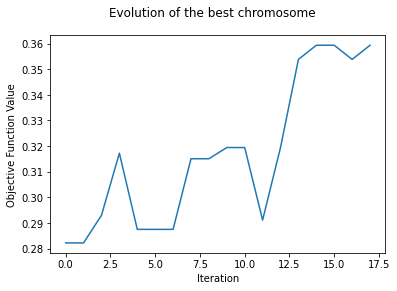

In [30]:
fig = plt.figure()
plt.plot(bestFitness)
fig.suptitle('Evolution of the best chromosome')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
print('Maximum Objective Function Value: ',max(bestFitness))
chromosome=max(collectionFitness)
wall = ''.join(map(str, chromosome[:4]))
roof = ''.join(map(str, chromosome[4:8]))
floor = ''.join(map(str, chromosome[8:12]))
window = ''.join(map(str, chromosome[12:]))
items = itemCost(wall,roof,floor,window)
totalCost=items[1]+items[3]+items[5]+items[7]
print("====================")
print(" ")
print("1. Wall")
print("   Material:",items[0])
print("   Cost: RM",items[1])
print(" ")
print("2. Roof")
print("   Material:",items[2])
print("   Cost: RM",items[3])
print(" ")
print("3. Floor")
print("   Material:",items[4])
print("   Cost: RM",items[5])
print(" ")
print("4. Window")
print("   Material:",items[6])
print("   Cost: RM",items[7])
print(" ")
print("RM :",totalCost)
print("====================")

In [21]:
print(bestFitness)

[0.2822085889570552, 0.2822085889570552, 0.2911392405063291, 0.2929936305732484, 0.32167832167832167, 0.32167832167832167, 0.32167832167832167, 0.31724137931034485, 0.32167832167832167, 0.3333333333333333, 0.3511450381679389, 0.3511450381679389, 0.3511450381679389, 0.35384615384615387, 0.35384615384615387, 0.35384615384615387, 0.35384615384615387, 0.40350877192982454]
